In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMI.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

      ID_CIDERH REGION   FECHA_RBE  TEMP_MAX_RBE      LAT_Y      LON_X
0      M_001_AH      I  2006-01-01         14.44 -20.678125 -68.707308
1      M_001_AH      I  2006-01-02         17.30 -20.678125 -68.707308
2      M_001_AH      I  2006-01-03         16.59 -20.678125 -68.707308
3      M_001_AH      I  2006-01-04         17.49 -20.678125 -68.707308
4      M_001_AH      I  2006-01-05         17.98 -20.678125 -68.707308
...         ...    ...         ...           ...        ...        ...
40301  M_212_AA      I  1994-10-16         22.20 -20.533000 -70.183000
40302  M_212_AA      I  1995-06-14         20.40 -20.533000 -70.183000
40303  M_212_AA      I  1996-01-14         25.00 -20.533000 -70.183000
40304  M_212_AA      I  1997-05-12         24.00 -20.533000 -70.183000
40305  M_212_AA      I  1998-11-10         20.90 -20.533000 -70.183000

[40306 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizTMI.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MAX_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMI.csv', index=False)

archivo_csv2 = "VMTMI.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

     M_001_AH  M_001_AJ  M_001_Q  M_002_AJ  M_002_H  M_002_Q    M_002_W  \
0       14.44      22.4     21.2     15.55    14.71     25.9  31.197500   
1       17.30      21.6     21.3     12.79    17.04     25.3  31.934167   
2       16.59      21.0     20.4     10.89    16.15     28.7  32.077500   
3       17.49      21.4     20.9     10.76    16.67     30.6  31.750000   
4       17.98      21.2     20.3     12.82    17.32     30.6  31.513333   
..        ...       ...      ...       ...      ...      ...        ...   
923     12.60      18.2     18.2       NaN    14.15     31.4  30.700000   
924     13.25      18.2     19.4       NaN    15.58     32.8  28.800000   
925     13.04      19.4     20.5       NaN    14.73     32.9  28.800000   
926     14.80      19.6     21.2       NaN     9.55     32.1  31.600000   
927     14.38      17.4     21.7       NaN     8.86     34.8  29.900000   

     M_003_H  M_004_H  M_005_H  ...  M_015_H  M_016_A  M_016_H  M_019_A  \
0      14.36    6.482   

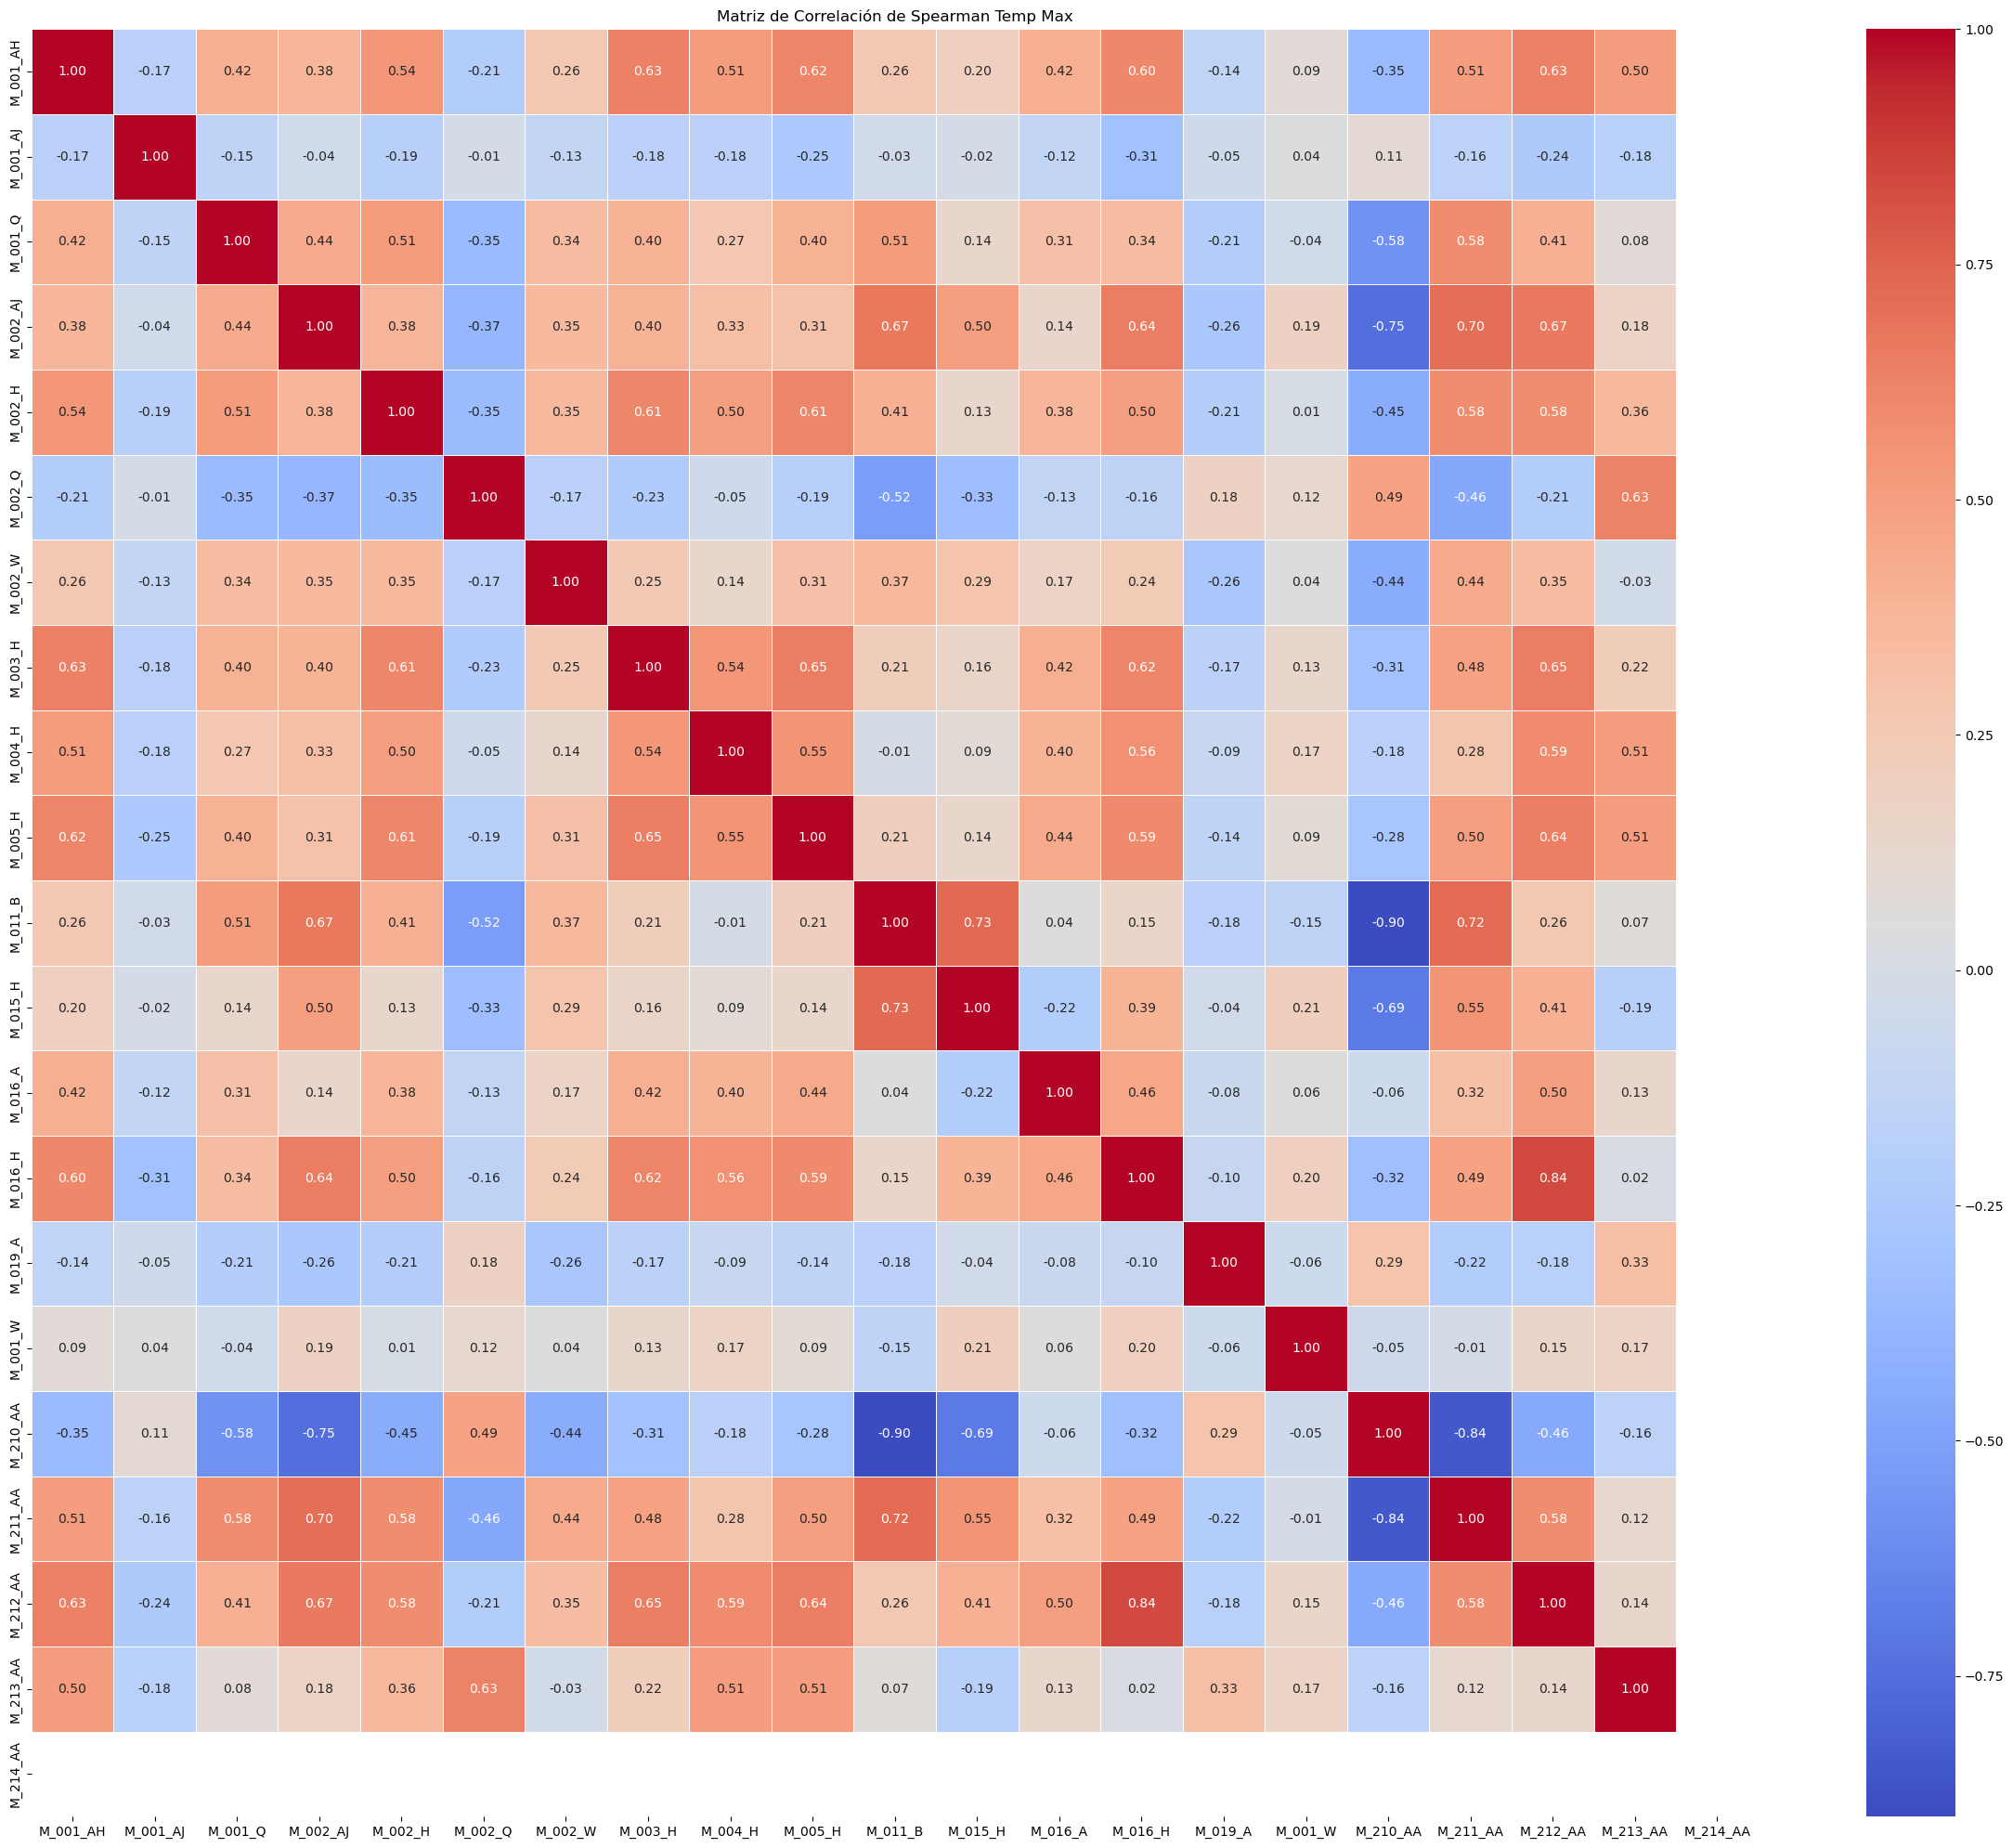

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Max")
plt.show()

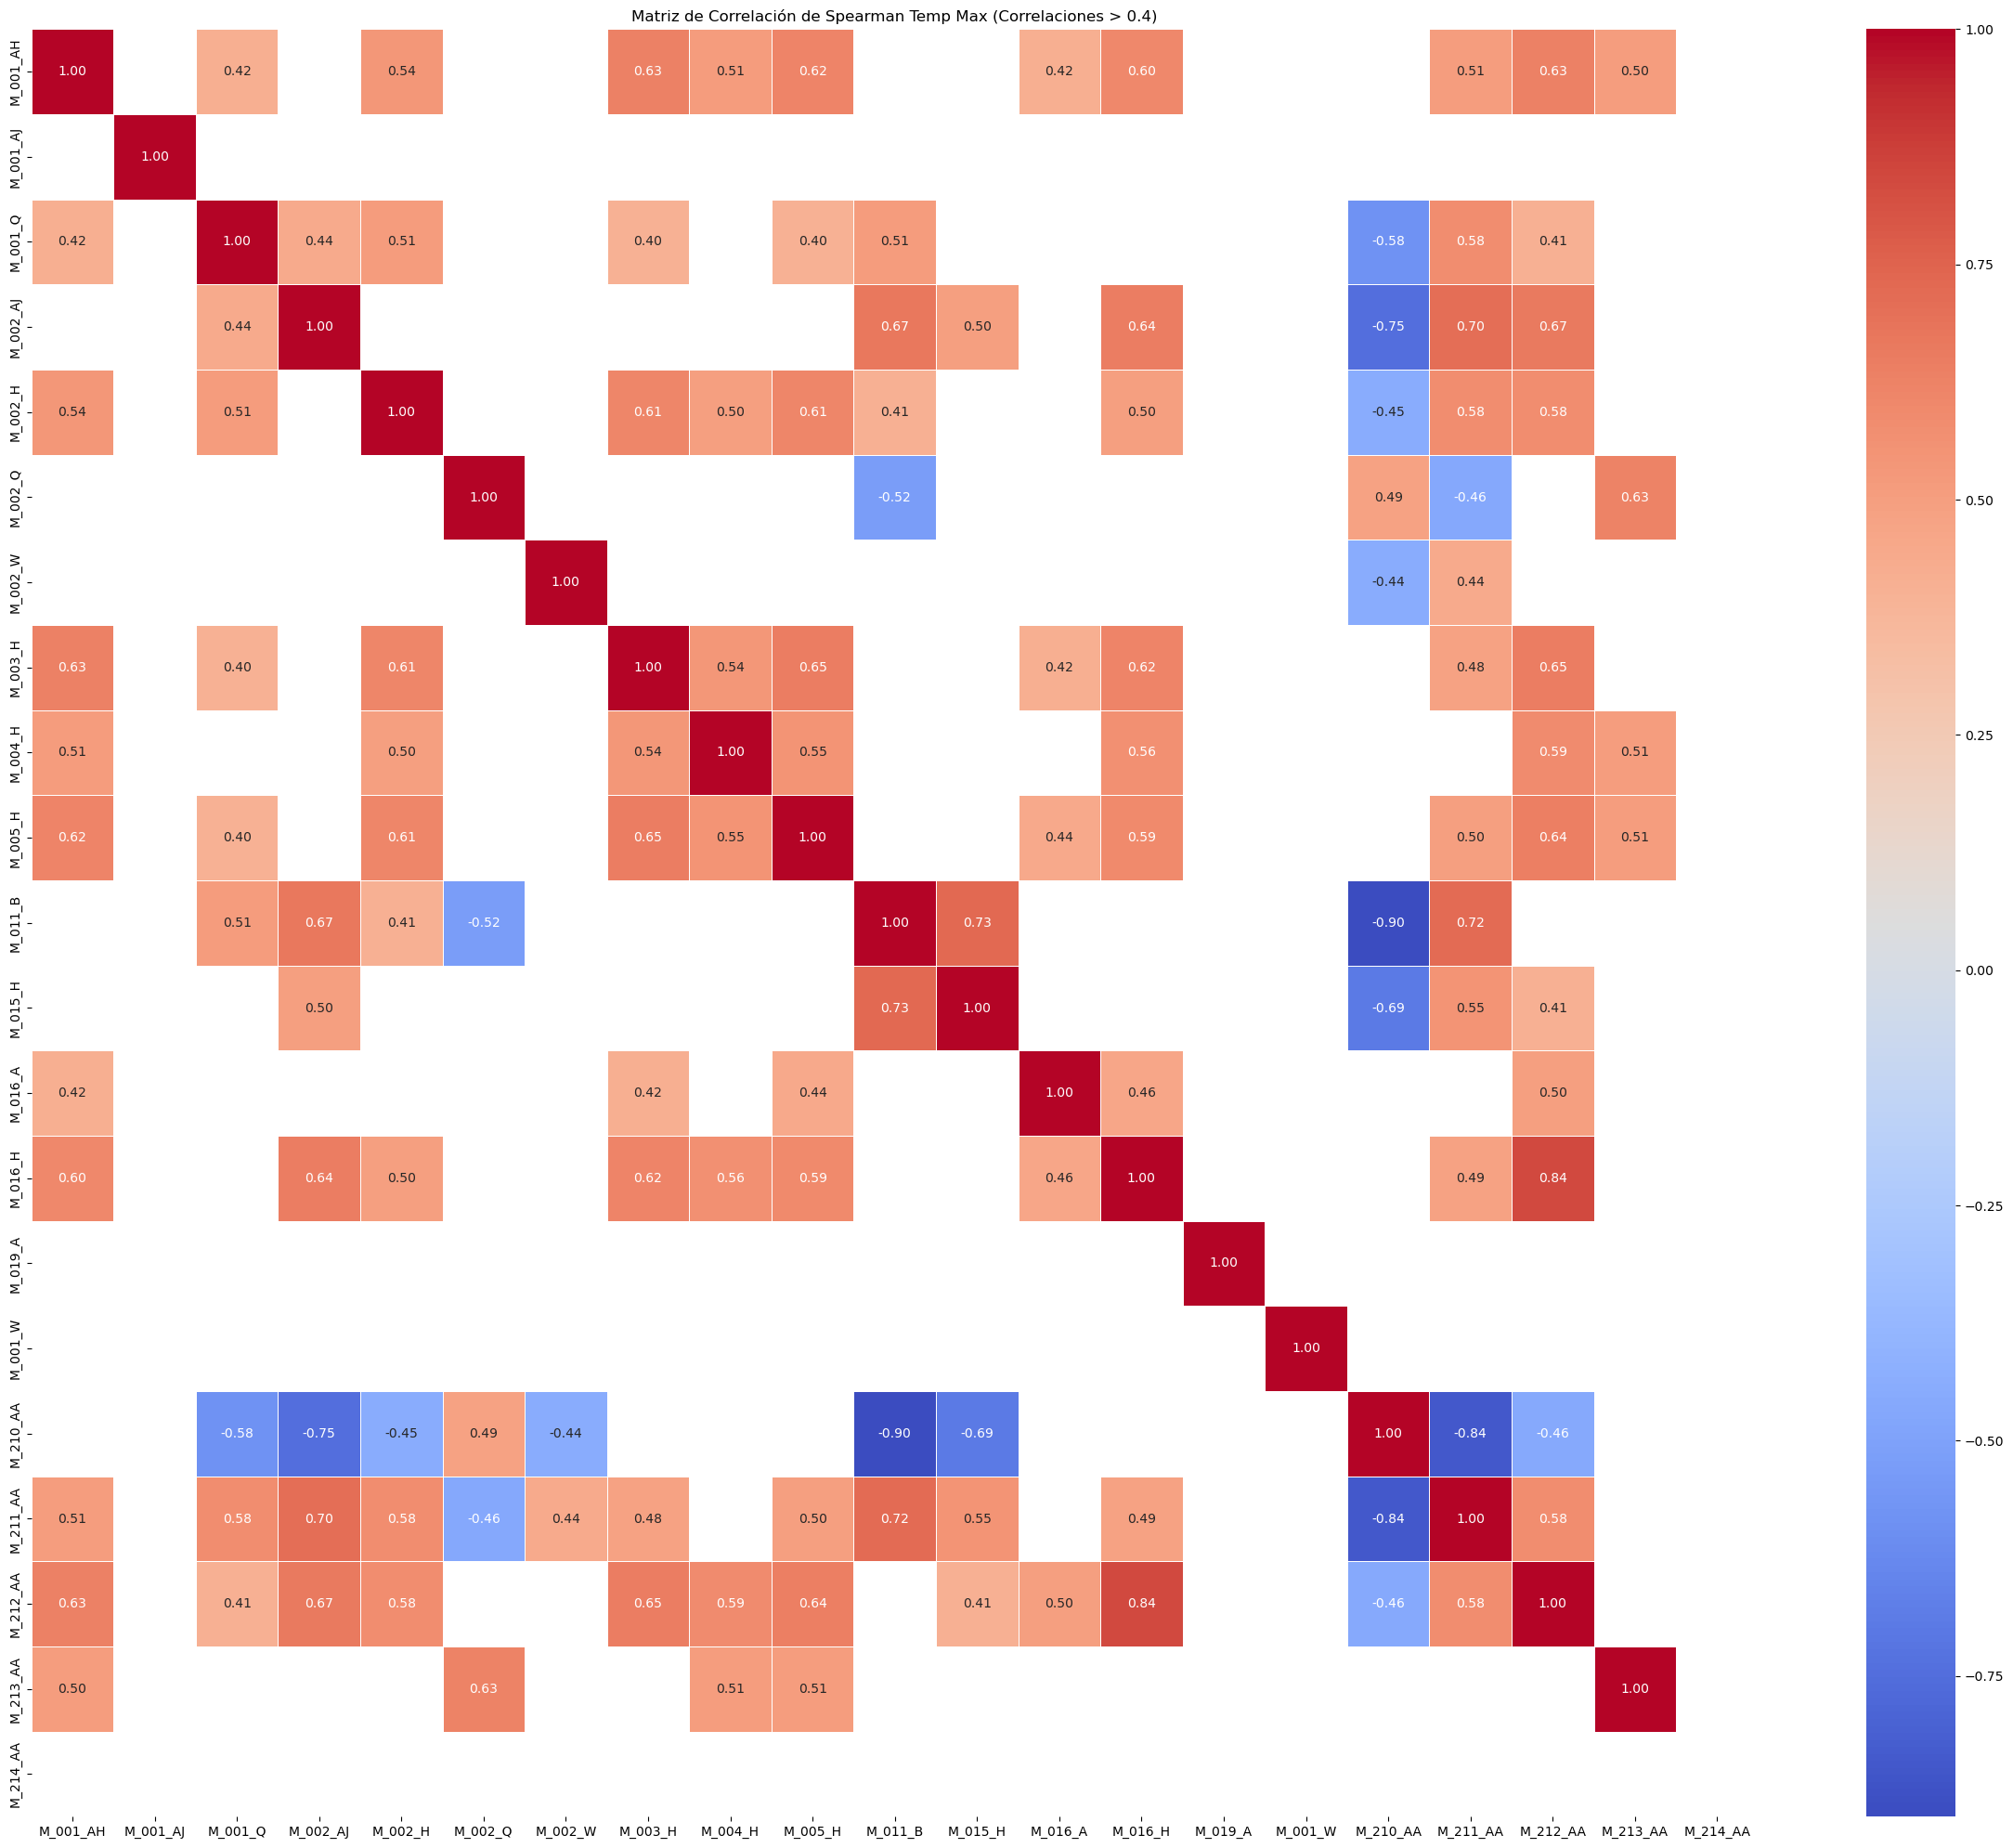

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Max (Correlaciones > 0.4)")
plt.show()

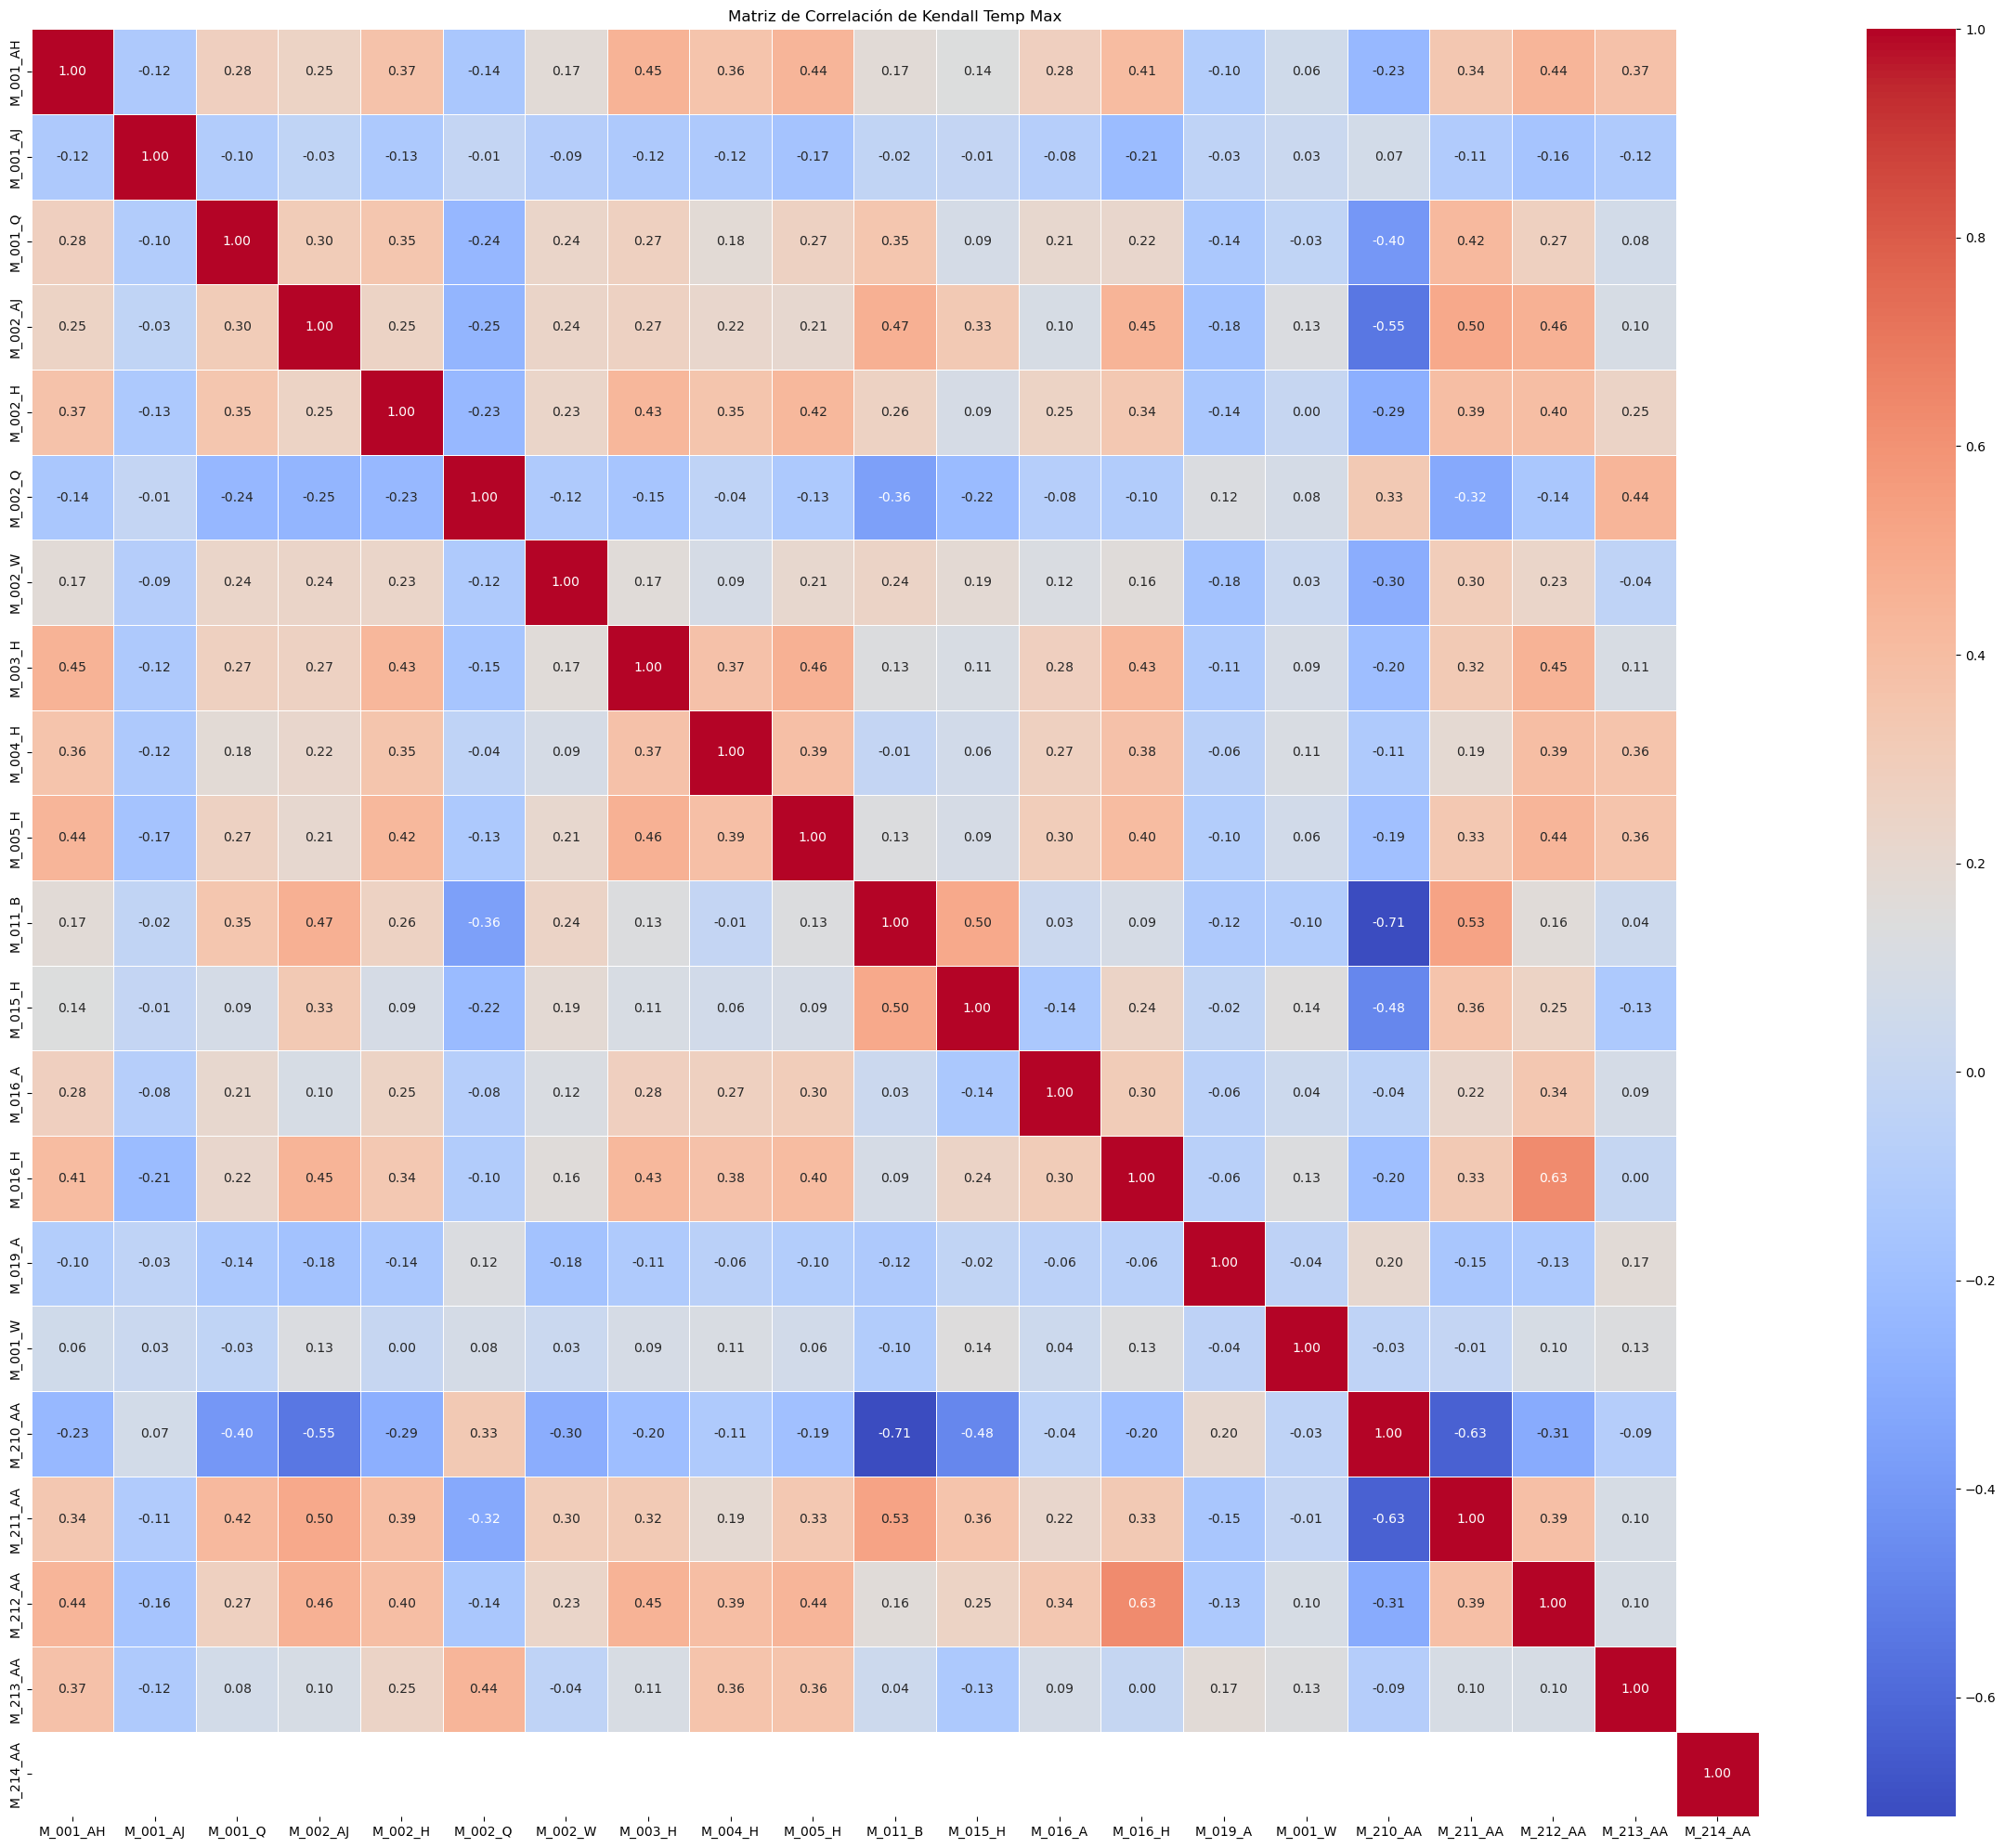

In [5]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall Temp Max")
plt.show()

In [1]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMI.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_I.html')